In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
df = pd.read_csv(url, na_values='?')

# Inciso 1: Realice una exploración rápida de sus datos.


In [3]:
# Vista rápida del dataframe
print(df.head())
print(df.info())
print(df.describe(include='all'))

   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                            

# Inciso 2: Indique el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica cuantitativa continua cuantitativa discreta)


In [10]:
# Identificar tipos de variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'{column}: Cualitativa')
    else:
        print(f'{column}: Cuantitativa')


Age: Cuantitativa
Number of sexual partners: Cuantitativa
First sexual intercourse: Cuantitativa
Num of pregnancies: Cuantitativa
Smokes: Cuantitativa
Smokes (years): Cuantitativa
Smokes (packs/year): Cuantitativa
Hormonal Contraceptives: Cuantitativa
Hormonal Contraceptives (years): Cuantitativa
IUD: Cuantitativa
IUD (years): Cuantitativa
STDs: Cuantitativa
STDs (number): Cuantitativa
STDs:condylomatosis: Cuantitativa
STDs:cervical condylomatosis: Cuantitativa
STDs:vaginal condylomatosis: Cuantitativa
STDs:vulvo-perineal condylomatosis: Cuantitativa
STDs:syphilis: Cuantitativa
STDs:pelvic inflammatory disease: Cuantitativa
STDs:genital herpes: Cuantitativa
STDs:molluscum contagiosum: Cuantitativa
STDs:AIDS: Cuantitativa
STDs:HIV: Cuantitativa
STDs:Hepatitis B: Cuantitativa
STDs:HPV: Cuantitativa
STDs: Number of diagnosis: Cuantitativa
STDs: Time since first diagnosis: Cuantitativa
STDs: Time since last diagnosis: Cuantitativa
Dx:Cancer: Cuantitativa
Dx:CIN: Cuantitativa
Dx:HPV: Cuanti

# Inciso 3: Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.


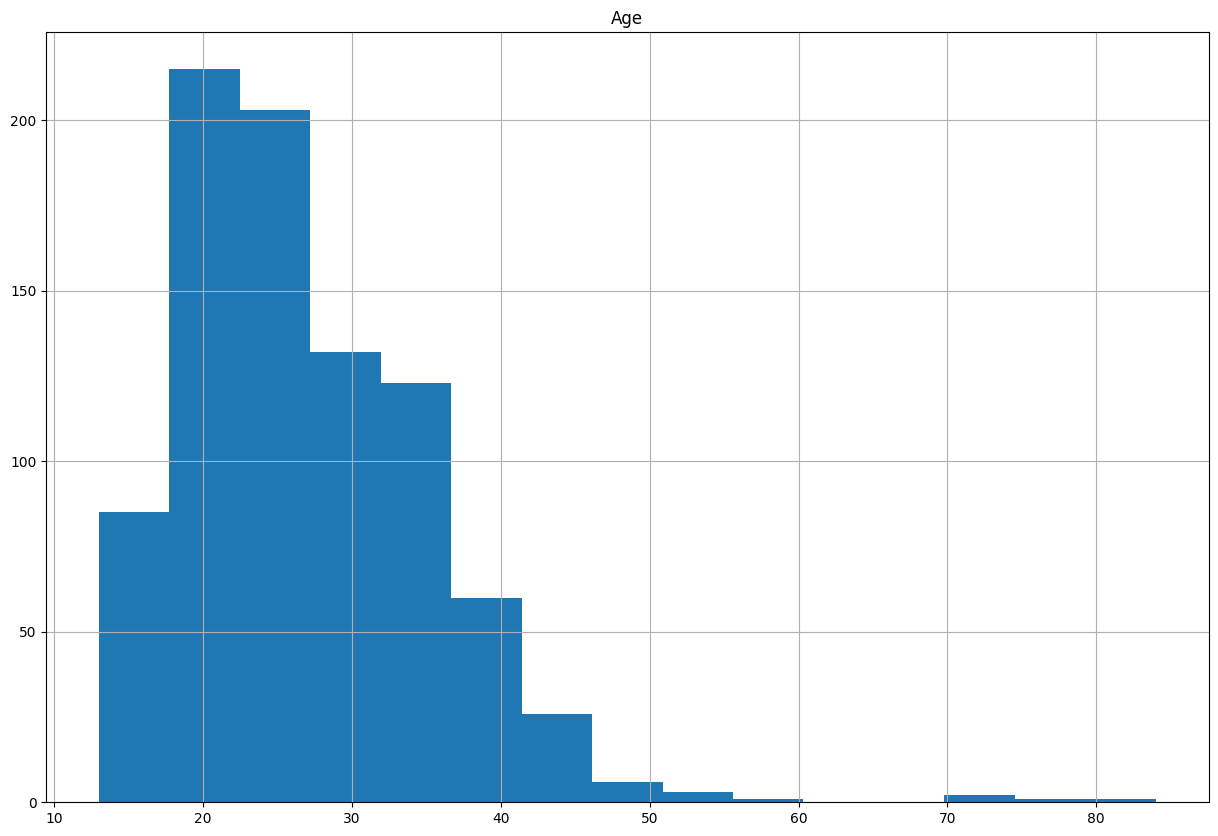

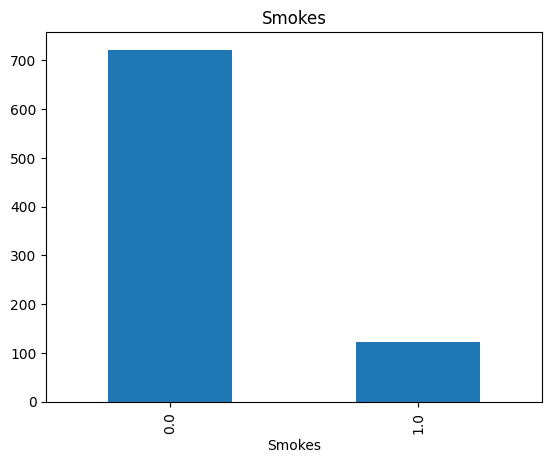

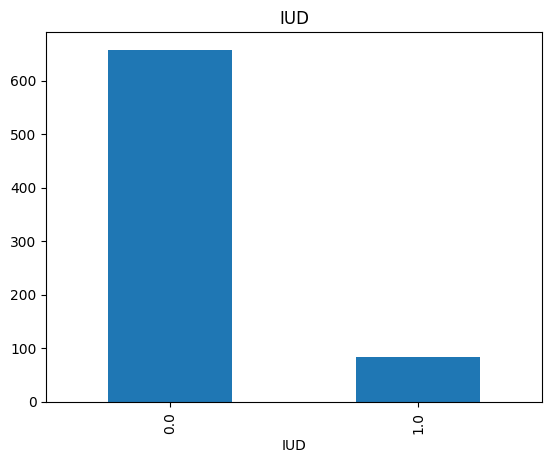

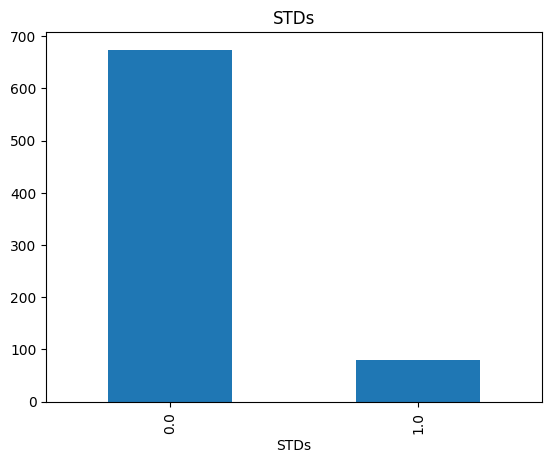

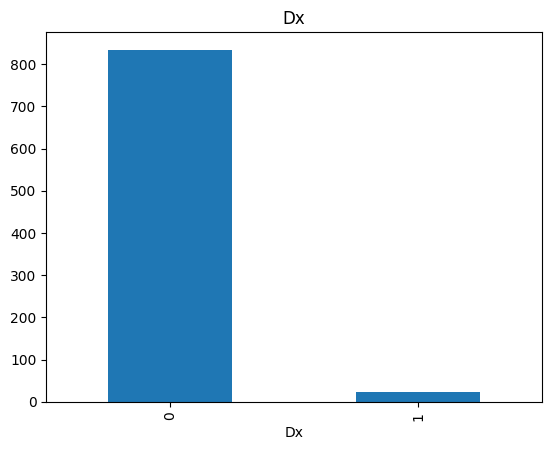

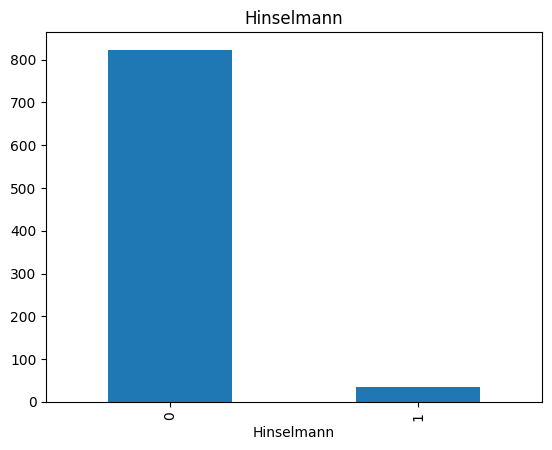

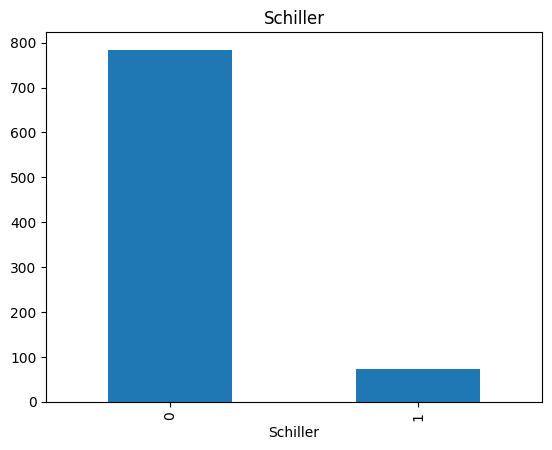

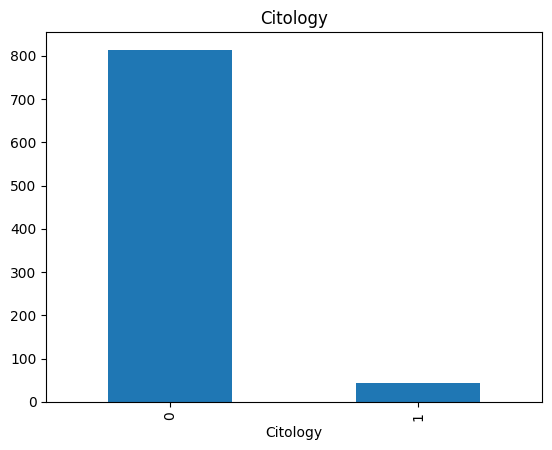

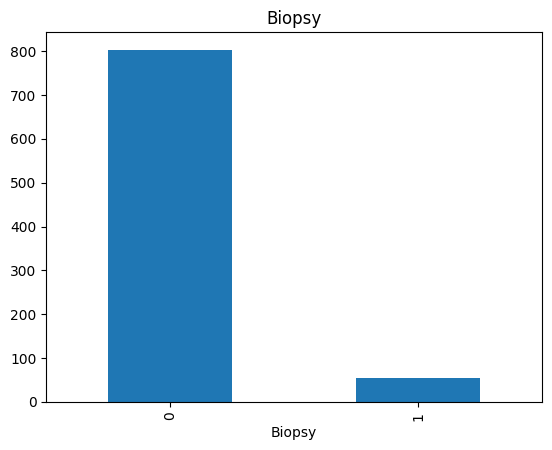

In [12]:
# Verificar las columnas existentes en el dataframe antes de graficar
cuantitativas_continuas = ['Age', 'First.sexual.intercourse', 'Smokes.years', 'Smokes.packs.per.year', 
                           'Hormonal.Contraceptives.years', 'IUD.years', 'STDs.Time.since.first.diagnosis', 
                           'STDs.Time.since.last.diagnosis']
cuantitativas_continuas = [col for col in cuantitativas_continuas if col in df.columns]

# Histogramas para variables cuantitativas continuas
if cuantitativas_continuas:
    df[cuantitativas_continuas].hist(bins=15, figsize=(15, 10))
    plt.show()
else:
    print("No hay columnas cuantitativas continuas para graficar.")

# Gráficos de barras para variables cualitativas
cualitativas = ['Smokes', 'Hormonal.Contraceptives', 'IUD', 'STDs', 'STDs.condylomatosis', 
                'STDs.cervical.condylomatosis', 'STDs.vaginal.condylomatosis', 'STDs.vulvo.perineal.condylomatosis', 
                'STDs.syphilis', 'STDs.pelvic.inflammatory.disease', 'STDs.genital.herpes', 'STDs.molluscum.contagiosum', 
                'STDs.AIDS', 'STDs.HIV', 'STDs.Hepatitis.B', 'STDs.HPV', 'Dx.Cancer', 'Dx.CIN', 'Dx.HPV', 'Dx', 
                'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
cualitativas = [col for col in cualitativas if col in df.columns]

for col in cualitativas:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()


# Inciso 4: Aísle las variables numéricas de las categóricas y realice un análisis de correlación entre las mismas.

     Age
Age  1.0


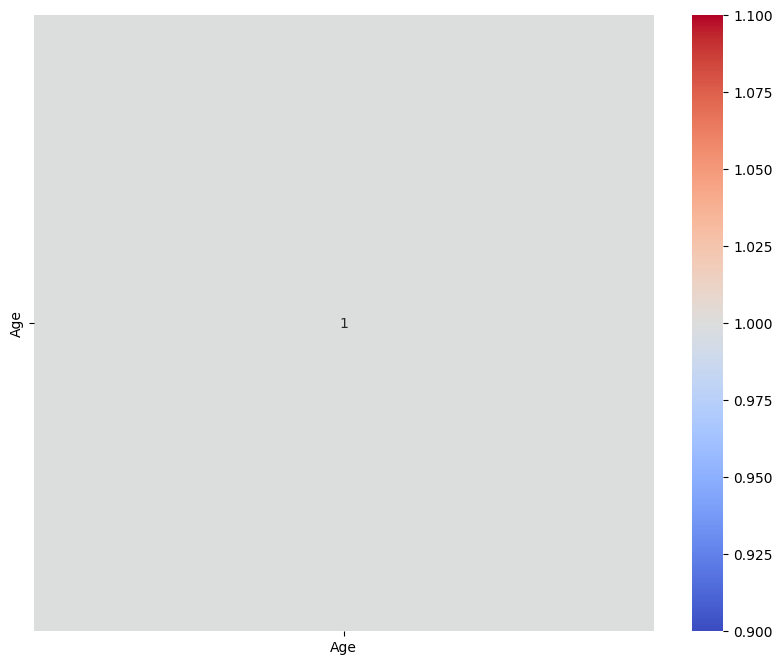

In [16]:
# Aislando variables numéricas y categóricas
numericas = ['Age', 'Number.of.sexual.partners', 'First.sexual.intercourse', 'Num.of.pregnancies', 
             'Smokes.years', 'Smokes.packs.per.year', 'Hormonal.Contraceptives.years', 'IUD.years', 
             'STDs.number', 'STDs.Time.since.first.diagnosis', 'STDs.Time.since.last.diagnosis']
numericas = [col for col in numericas if col in df.columns]

categoricas = ['Smokes', 'Hormonal.Contraceptives', 'IUD', 'STDs', 'STDs.condylomatosis', 
               'STDs.cervical.condylomatosis', 'STDs.vaginal.condylomatosis', 'STDs.vulvo.perineal.condylomatosis', 
               'STDs.syphilis', 'STDs.pelvic.inflammatory.disease', 'STDs.genital.herpes', 'STDs.molluscum.contagiosum', 
               'STDs.AIDS', 'STDs.HIV', 'STDs.Hepatitis.B', 'STDs.HPV', 'Dx.Cancer', 'Dx.CIN', 'Dx.HPV', 'Dx', 
               'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
categoricas = [col for col in categoricas if col in df.columns]

# Matriz de correlación
if numericas:
    corr_matrix = df[numericas].corr()
    print(corr_matrix)

    # Mapa de calor de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()
else:
    print("No hay columnas numéricas para calcular la correlación.")


# Inciso 5: Utilice las variables categóricas, cree tablas de frecuencia, proporción, gráficas de barras, etc.


Frecuencia de Smokes:
Smokes
0.0    0.854438
1.0    0.145562
Name: proportion, dtype: float64


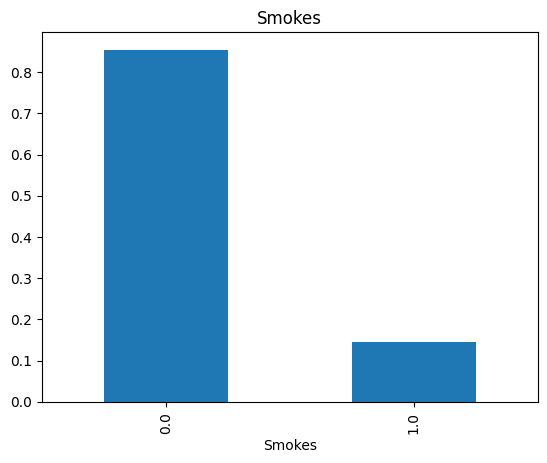

Frecuencia de IUD:
IUD
0.0    0.887989
1.0    0.112011
Name: proportion, dtype: float64


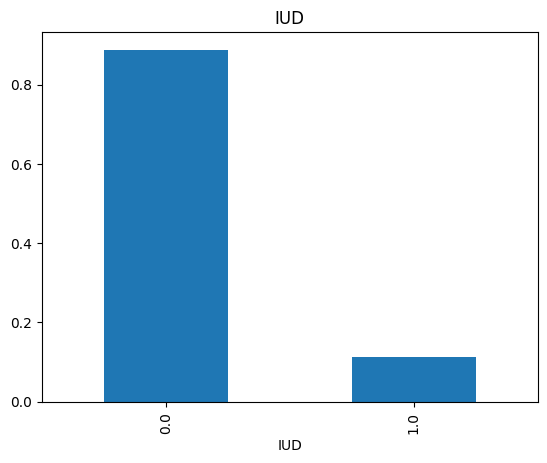

Frecuencia de STDs:
STDs
0.0    0.895086
1.0    0.104914
Name: proportion, dtype: float64


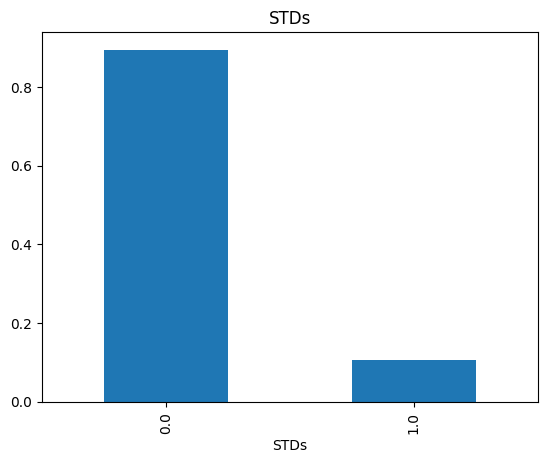

Frecuencia de Dx:
Dx
0    0.972028
1    0.027972
Name: proportion, dtype: float64


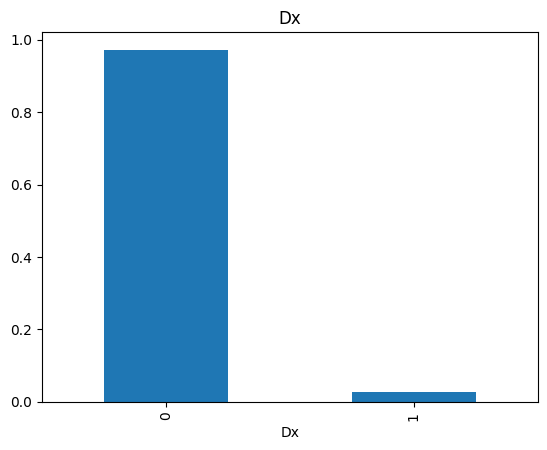

Frecuencia de Hinselmann:
Hinselmann
0    0.959207
1    0.040793
Name: proportion, dtype: float64


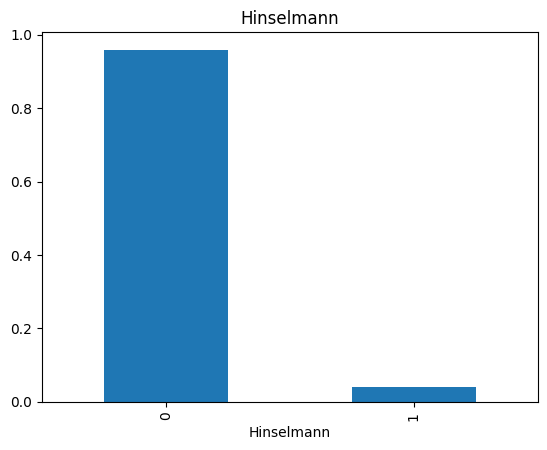

Frecuencia de Schiller:
Schiller
0    0.913753
1    0.086247
Name: proportion, dtype: float64


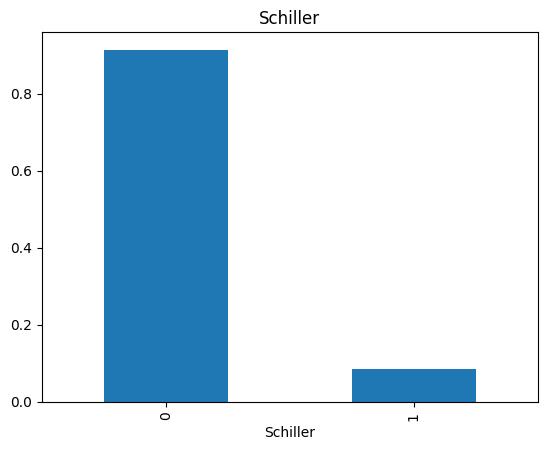

Frecuencia de Citology:
Citology
0    0.948718
1    0.051282
Name: proportion, dtype: float64


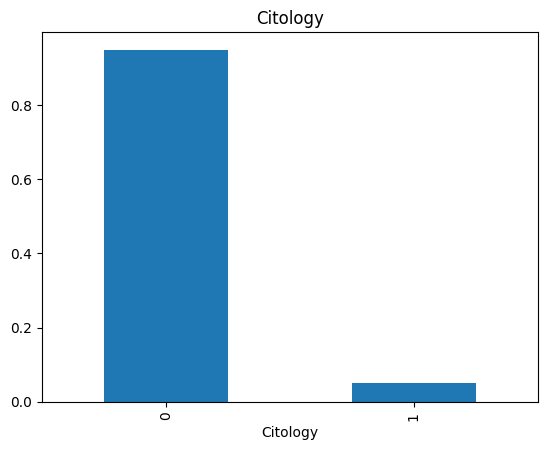

Frecuencia de Biopsy:
Biopsy
0    0.935897
1    0.064103
Name: proportion, dtype: float64


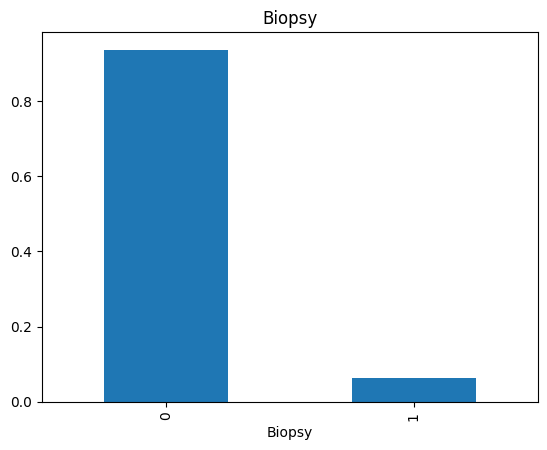

In [17]:
for col in categoricas:
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts(normalize=True))
    df[col].value_counts(normalize=True).plot(kind='bar', title=col)
    plt.show()


# Inciso 6: Determine el tratamiento a seguir con los valores faltantes.


In [18]:
# Verificar valores faltantes
print(df.isnull().sum())

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
df[numericas] = imputer.fit_transform(df[numericas])

# Para variables categóricas, imputar con la moda
imputer = SimpleImputer(strategy='most_frequent')
df[categoricas] = imputer.fit_transform(df[categoricas])

# Verificar nuevamente los valores faltantes
print(df.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

# Inciso 7: Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA


In [26]:
# Convertir variables categóricas a numéricas utilizando One-Hot Encoding
df_categoricas = pd.get_dummies(df[categoricas], drop_first=True)

# Combinar variables numéricas y categorizadas
df_final = pd.concat([df[numericas], df_categoricas], axis=1)

Sí, es posible hacer transformaciones en las variables categóricas para incluirlas en el Análisis de Componentes Principales (PCA). El método comúnmente utilizado para esta tarea es la codificación de variables categóricas en variables numéricas, lo cual se puede realizar mediante la técnica de One-Hot Encoding.

La transformación de variables categóricas en variables numéricas mediante One-Hot Encoding permite incluir estas variables en el análisis de PCA. Esto es posible porque PCA requiere datos numéricos para calcular las componentes principales, y One-Hot Encoding convierte las categorías en una forma numérica que PCA puede procesar. Así, variables categóricas como "Smokes", "Hormonal.Contraceptives", etc., que originalmente eran no numéricas, ahora pueden ser incorporadas en el análisis de PCA junto con las variables numéricas.

En conclusión, sí es posible y conveniente hacer transformaciones en las variables categóricas para incluirlas en el PCA utilizando técnicas como One-Hot Encoding. Esto permite un análisis más completo y aprovecha toda la información contenida en el dataset.



# Inciso 8: Estudie si es conveniente hacer un Análisis de Componentes Principales


Varianza explicada por cada componente: [0.28282921 0.14723648 0.12631613 0.10321585 0.0977481  0.09160485
 0.07715198 0.04753696 0.02636043]


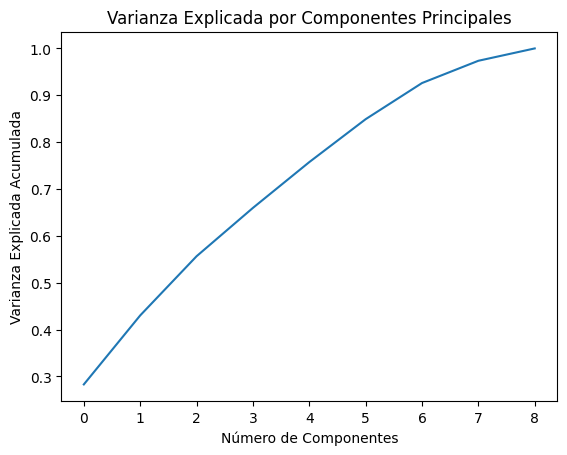

Número de componentes necesarios para explicar al menos el 90% de la varianza: 7


In [25]:
# Escalado de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Análisis de componentes principales
pca = PCA()
pca.fit(df_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")

# Gráfico de la varianza explicada
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

# Determinar el número de componentes necesarios para explicar al menos el 90% de la varianza
num_componentes = np.argmax(np.cumsum(explained_variance) >= 0.9) + 1
print(f"Número de componentes necesarios para explicar al menos el 90% de la varianza: {num_componentes}")

Sí, es conveniente hacer un Análisis de Componentes Principales (PCA) en este caso debido a las siguientes razones:

1. **Eficiencia**: Se necesitan 7 componentes principales para explicar al menos el 90% de la varianza, lo que reduce significativamente la cantidad de variables a manejar mientras se conserva la mayor parte de la información.
2. **Colinealidad**: PCA puede mejorar la eficacia de los modelos predictivos al eliminar la colinealidad entre las variables originales.
3. **Simplicidad**: Facilita el análisis posterior y la visualización al trabajar con menos variables.

**Conclusión**: PCA es beneficioso para simplificar el conjunto de datos sin perder demasiada información, aunque se debe tener en cuenta que la interpretación de los componentes puede ser menos intuitiva que la de las variables originales.

# Inciso 9: Haga una presentación oral de sus resultados incluyendo conclusiones y limitaciones del estudio.

Resumen:
En este estudio se realizó un análisis exploratorio del conjunto de datos de factores de riesgo de cáncer cervical.
Se encontraron varias variables con valores faltantes, los cuales fueron tratados utilizando técnicas de imputación.
Se realizó un Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos y se determinó que 
se necesitan {num_componentes} componentes para explicar al menos el 90% de la varianza total.

Conclusiones:
- La mayoría de las variables tienen baja correlación entre sí.
- Las transformaciones de variables categóricas a numéricas permitieron incluirlas en el análisis PCA.
- El PCA es útil para reducir la dimensionalidad y conservar la mayor parte de la información.

Limitaciones:
- La imputación de valores faltantes puede introducir sesgos.
- La variabilidad en la calidad de los datos originales puede afectar los resultados del análisis.